In [326]:
import gym
import numpy as np
from random import random
import matplotlib.pyplot as plt
#matplotlib inline

In [327]:
env = gym.make('CartPole-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/vrishank/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [328]:
env.reset()

array([-0.02925289,  0.00134454,  0.01979725,  0.04943716])

In [329]:
env.step(0)

(array([-0.029226  , -0.19405561,  0.02078599,  0.34829996]), 1.0, False, {})

In [351]:
D1=16
D2=16

In [352]:
def sigmoid(x): 
  return 1.0 / (1.0 + np.exp(-x))

def make_model():
    W1 = np.random.randn(D1,4) / np.sqrt(4) # "Xavier" initialization
    W2 = np.random.randn(D2) / np.sqrt(D2)
    return W1, W2

In [353]:
def policy_forward(W1, W2, x):
  h = np.dot(W1, x)
  h[h<0] = 0 # ReLU nonlinearity
  logp = np.dot(W2, h)
  p = sigmoid(logp)
  return p, h

In [354]:
W1 = np.random.randn(D1,4) / np.sqrt(4) # "Xavier" initialization
W2 = np.random.randn(D2) / np.sqrt(D2)

def fitness_ind(W1, W2):
    state = env.reset()
    for i in range(500):
        next_state, reward, done, info = env.step(int(((policy_forward(W1, W2, state)[0])*2)//1))
        if done:
            return i

In [355]:
def individual():
    return make_model()
def population(count):
    return [ individual() for x in range(0, count) ]

In [356]:
def grade(population):
    scores=[]
    for ind in population:
        scores.append(fitness_ind(ind[0], ind[1]))
    return scores

pop = population(100)

In [380]:
def evolve(pop, retain=0.5, random_select=0.5, mutate=0.5):
    graded = [ (fitness_ind(x[0], x[1]), x) for x in pop]
    graded = [ x[1] for x in sorted(graded, key = lambda i: i[0])]
    retain_length = int(len(graded)*retain)

    parents = []
    children = []
    for individual in graded[retain_length:]:
        if random_select > random():
            parents.append(individual)
    #print(len(parents))
    
    for individual in parents:
        if mutate > random():
            child = []
            child.append(individual[0]+((np.random.randn(D1,4) / 10)))
            child.append(individual[1]+((np.random.randn(D1) / 10)))
            children.append(child)
    parents.extend(children)

    parents_length = len(parents)
    desired_length = len(pop) - parents_length

    children = []
    #print(parents)
    while len(children) < desired_length:
        male = parents[np.random.randint(0, len(parents))]
        female = parents[np.random.randint(0, len(parents))]
        child = []
        #print(male[0])
        child.append(male[0])
        child.append(female[1])
        children.append(child)
    
    parents.extend(children)
    return parents

Epoch: 0


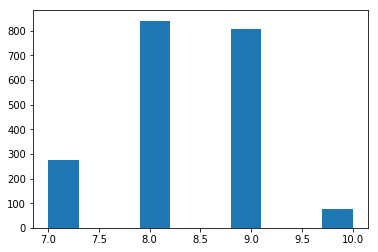

Epoch: 10


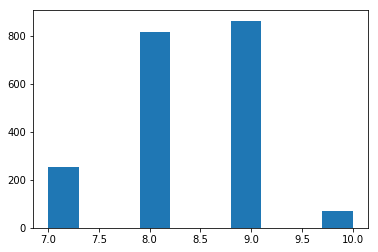

Epoch: 20


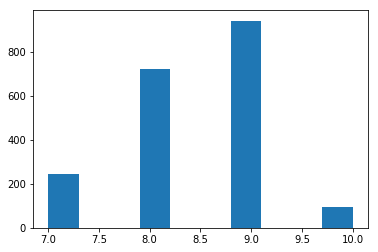

Epoch: 30


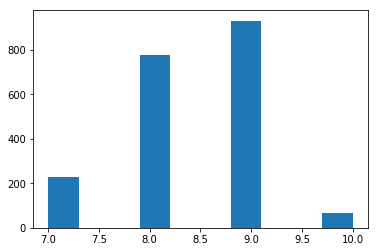

Epoch: 40


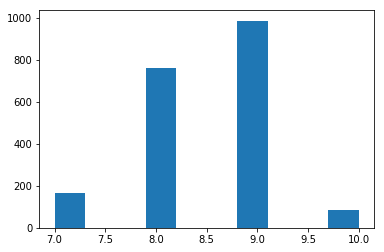

Epoch: 50


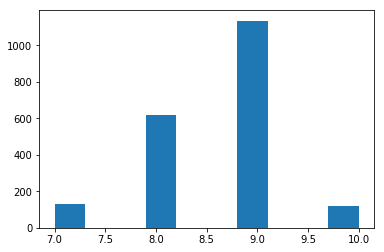

Epoch: 60


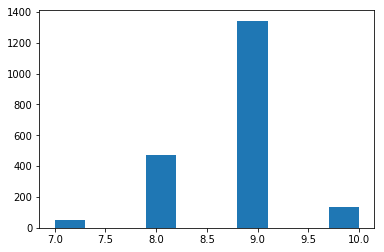

Epoch: 70


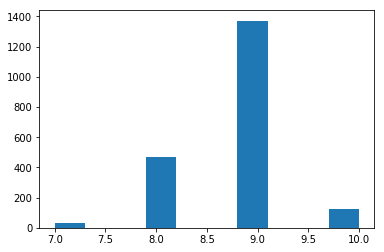

Epoch: 80


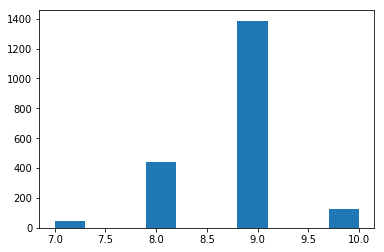

Epoch: 90


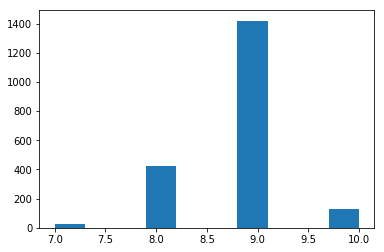

Epoch: 100


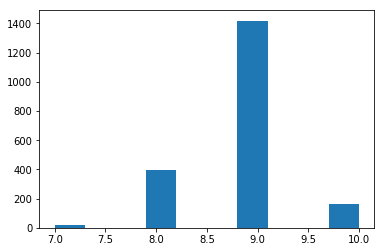

Epoch: 110


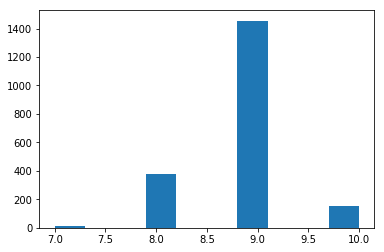

Epoch: 120


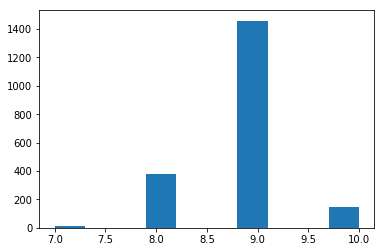

Epoch: 130


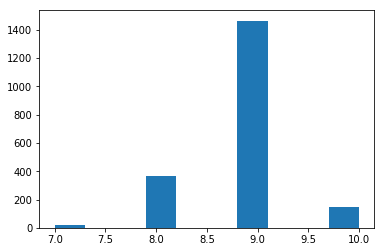

Epoch: 140


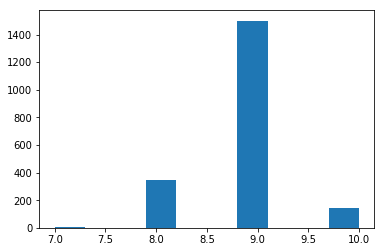

Epoch: 150


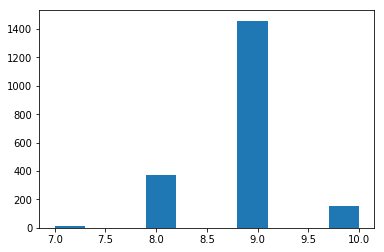

Epoch: 160


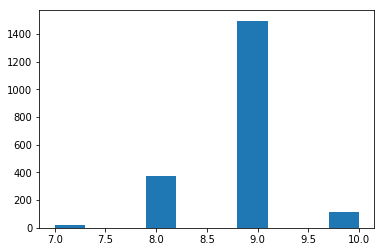

Epoch: 170


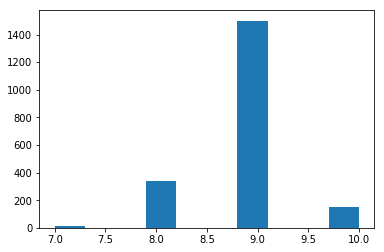

Epoch: 180


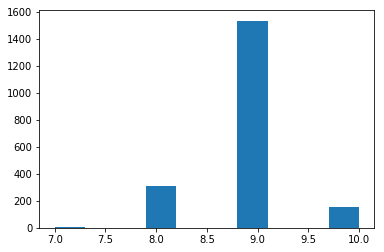

Epoch: 190


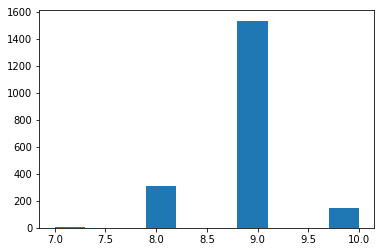

Epoch: 200


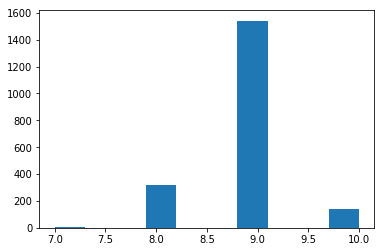

Epoch: 210


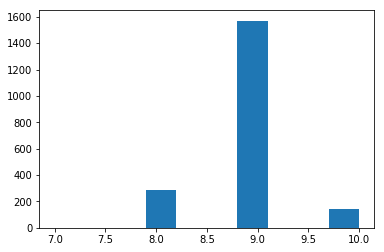

Epoch: 220


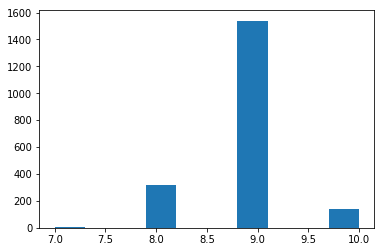

Epoch: 230


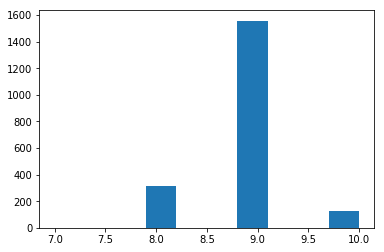

Epoch: 240


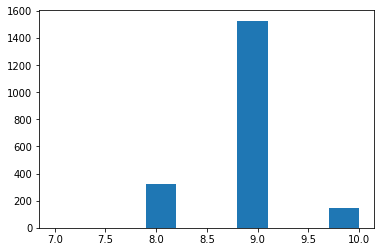

Epoch: 250


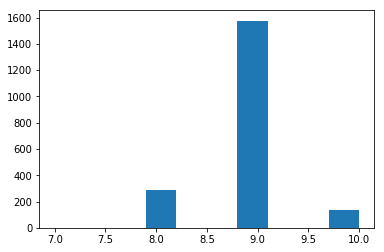

Epoch: 260


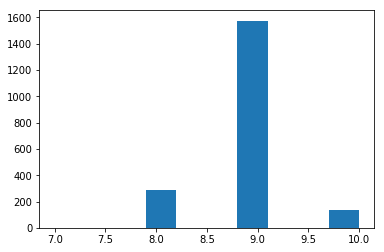

Epoch: 270


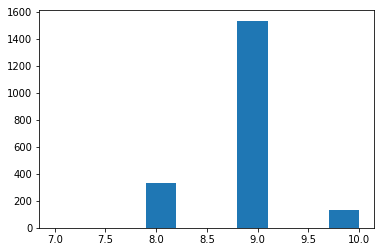

Epoch: 280


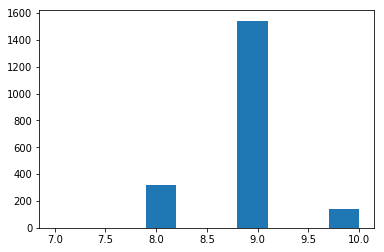

Epoch: 290


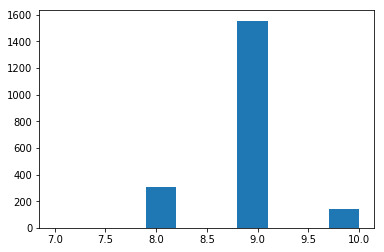

Epoch: 300


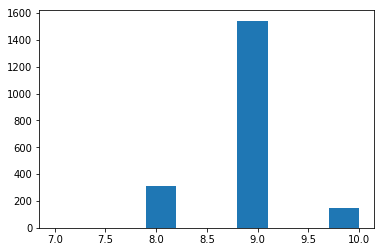

Epoch: 310


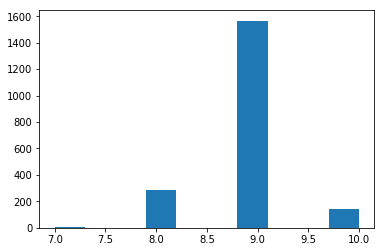

Epoch: 320


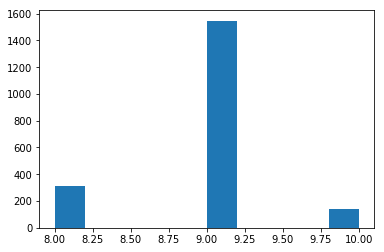

Epoch: 330


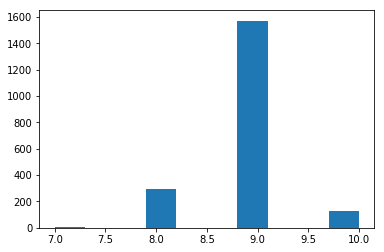

Epoch: 340


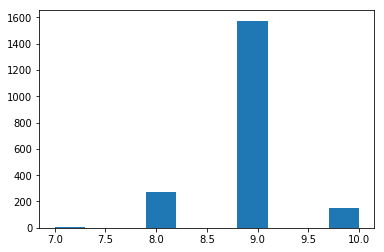

Epoch: 350


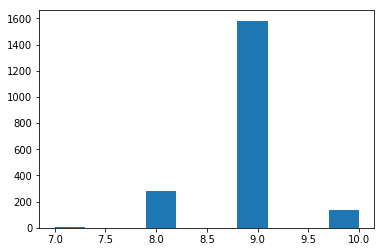

Epoch: 360


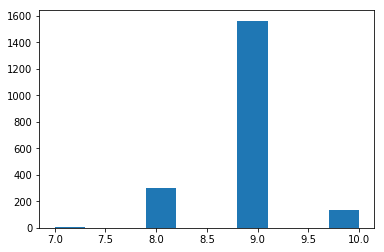

Epoch: 370


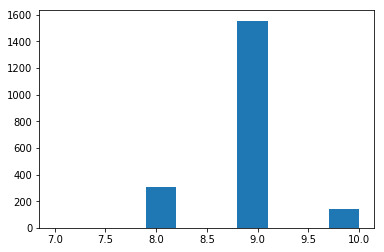

Epoch: 380


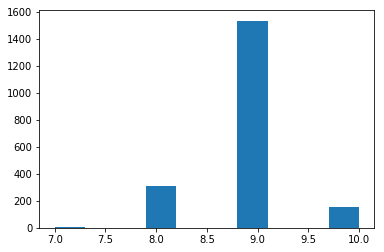

Epoch: 390


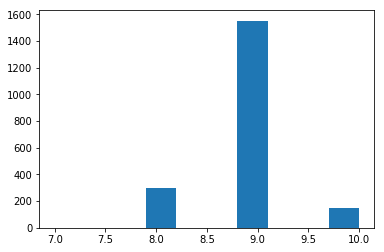

Epoch: 400


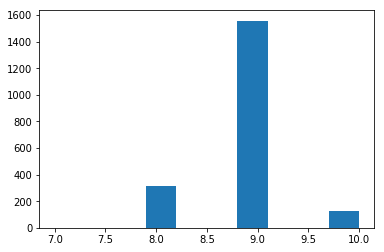

KeyboardInterrupt: 

In [381]:
pop = population(2000)
for i in range(1000):
    if i%10==0:
        print("Epoch: %d" % (i))
        plt.hist(grade(pop))
        plt.show()
    pop = evolve(pop)